In [1]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np
! pip install qutip # for Google Colab
from qutip import (
    Qobj,
    QobjEvo,
    Bloch,
    basis,
    sigmax,
    sigmay,
    sigmaz,
    qeye,
    mesolve,
    expect,
    tensor,
    ket2dm,

)
from qutip.piqs.piqs import purity_dicke
from qutip.visualization import matrix_histogram
from qutip.measurement import measure, measurement_statistics
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 23.1 MB/s eta 0:00:00


### Reference links about QuTip


*   Quantum measurement: https://qutip.readthedocs.io/en/qutip-5.0.x/guide/guide-measurement.html

# Performing a basic measurement (Observable)
First we need to select some states to measure. For now, let us create $|0\rangle$ state and $|1\rangle$ state:

In [2]:
g_state =  basis(2, 0)
print(g_state)

e_state =  basis(2, 1)
print(e_state)

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [1.]]


With qutip `measure` function, you can see the demo of how quantum measurement is done. For the first argument is the satate vector (or density matrix) of the measured quantum state and the second is the operators or the sets of projection operators you want to measure.

You can run the same cell multiple times and see if the measurement result will change.

Link: https://qutip.readthedocs.io/en/qutip-5.0.x/apidoc/functions.html#qutip.measurement.measure

In [3]:
# measure sigmaz of the up state
measure(g_state, sigmaz()) # this will show +1 always

(1.0,
 Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[1.]
  [0.]])

In [4]:
# measure sigmaz of the down state
measure(e_state, sigmaz()) # this will show -1 always

(-1.0,
 Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[0.]
  [1.]])

In [8]:
# measure sigmax of the up state
measure(g_state, sigmax()) # the result will change every time

(-1.0,
 Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[ 0.70710678]
  [-0.70710678]])

In [15]:
# measure sigmax of the down state
measure(e_state, sigmax()) # the result will change every time

(1.0,
 Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[0.70710678]
  [0.70710678]])

With `measurement_statistics` function, we can obtain the statistics result of the quantum measurement. Here we try to plot the bar graph of each probability.

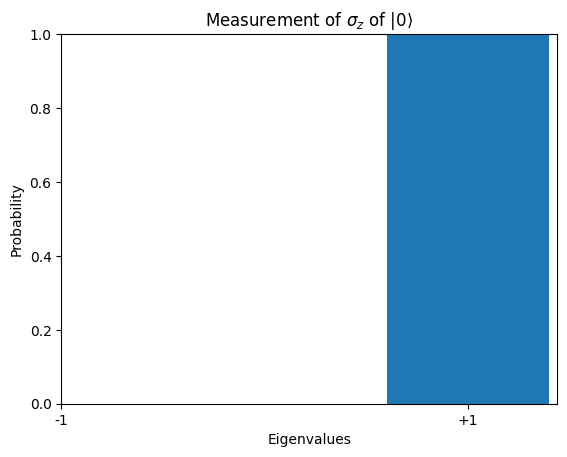

In [18]:
# measure sigmaz of |0> state
# Get eigenvalues, eigenstates, and probabilities of measuring sigmaz
eigenvalues, eigenstates, probabilities = measurement_statistics(g_state, sigmaz())

# Plot the results
plt.bar(eigenvalues, probabilities)

# Set x-ticks to only show -1 and +1
plt.xticks([-1, 1], labels=["-1", "+1"])
plt.ylim(0,1)

# Labeling and title
plt.xlabel("Eigenvalues")
plt.ylabel("Probability")
plt.title(r"Measurement of $\sigma_z$ of $|0\rangle$")

# Show the plot
plt.show()

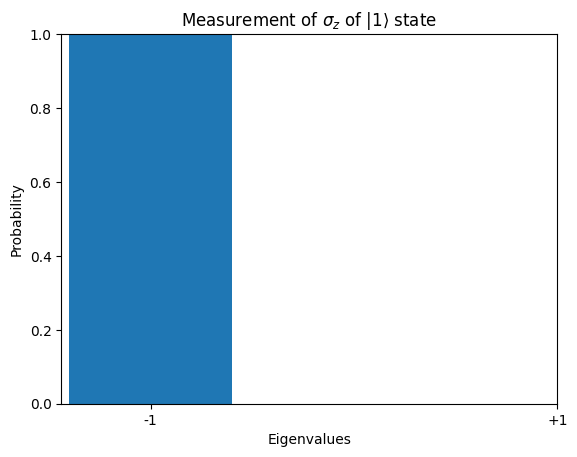

In [20]:
# measure sigmaz of |1> state
# Get eigenvalues, eigenstates, and probabilities of measuring sigmaz
eigenvalues, eigenstates, probabilities = measurement_statistics(e_state, sigmaz())

# Plot the results
plt.bar(eigenvalues, probabilities)

# Set x-ticks to only show -1 and +1
plt.xticks([-1, 1], labels=["-1", "+1"])
plt.ylim(0,1)

# Labeling and title
plt.xlabel("Eigenvalues")
plt.ylabel("Probability")
plt.title(r"Measurement of $\sigma_z$ of $|1\rangle$ state")

# Show the plot
plt.show()

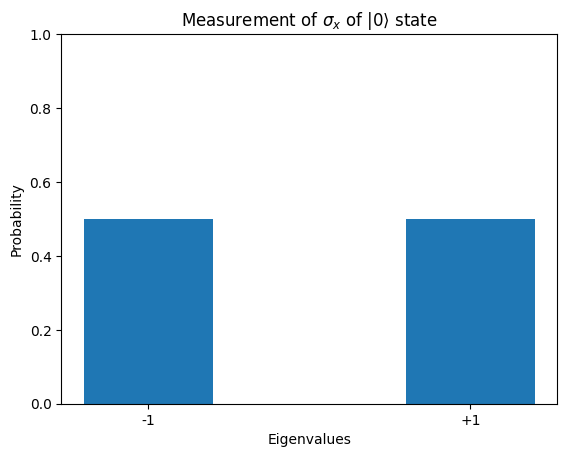

In [21]:
# measure sigmax of the |0> state
# Get eigenvalues, eigenstates, and probabilities of measuring sigmaz
eigenvalues, eigenstates, probabilities = measurement_statistics(g_state, sigmax())

# Plot the results
plt.bar(eigenvalues, probabilities)

# Set x-ticks to only show -1 and +1
plt.xticks([-1, 1], labels=["-1", "+1"])
plt.ylim(0,1)

# Labeling and title
plt.xlabel("Eigenvalues")
plt.ylabel("Probability")
plt.title(r"Measurement of $\sigma_x$ of $|0\rangle$ state")

# Show the plot
plt.show()

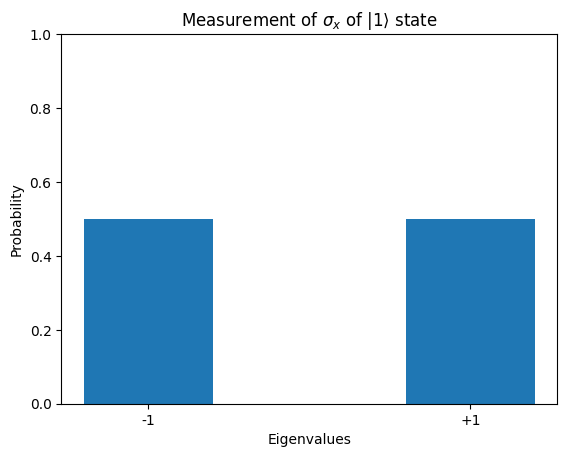

In [22]:
# measure sigmax of the |1> state
# Get eigenvalues, eigenstates, and probabilities of measuring sigmaz
eigenvalues, eigenstates, probabilities = measurement_statistics(e_state, sigmax())

# Plot the results
plt.bar(eigenvalues, probabilities)

# Set x-ticks to only show -1 and +1
plt.xticks([-1, 1], labels=["-1", "+1"])
plt.ylim(0,1)

# Labeling and title
plt.xlabel("Eigenvalues")
plt.ylabel("Probability")
plt.title(r"Measurement of $\sigma_x$ of $|1\rangle$ state")

# Show the plot
plt.show()